In [52]:
# Importamos librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [53]:
# Creamos el dataframe

url = r'C:\Users\34722\Documents\DataScience\EjerciciosResueltos\Entregas\src\data\car_price_data1_limpio.csv'
dataframe = pd.read_csv(url)

In [54]:
print('-'*50,'FORMA 1','-'*50)
print('-'*50,'FORMA 1','-'*50)
print('-'*50,'FORMA 1','-'*50)
print('-'*50,'FORMA 1','-'*50)
print('-'*50,'FORMA 1','-'*50)
print('-'*50,'FORMA 1','-'*50)

-------------------------------------------------- FORMA 1 --------------------------------------------------
-------------------------------------------------- FORMA 1 --------------------------------------------------
-------------------------------------------------- FORMA 1 --------------------------------------------------
-------------------------------------------------- FORMA 1 --------------------------------------------------
-------------------------------------------------- FORMA 1 --------------------------------------------------
-------------------------------------------------- FORMA 1 --------------------------------------------------


<Axes: title={'center': 'Precio vs Año'}, xlabel='Year', ylabel='Price'>

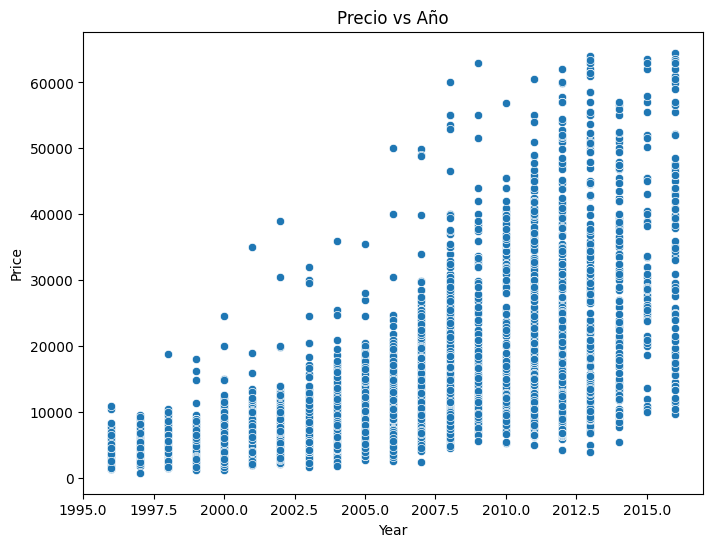

In [55]:
# Vemos la distribucion del precio conforme a la antiguedad del vehiculo

plt.figure(figsize=[8,6])
plt.title("Precio vs Año")
sns.scatterplot(x='Year',y='Price',data=dataframe)

<Axes: title={'center': 'Precio vs Kilometraje'}, xlabel='Price', ylabel='Mileage'>

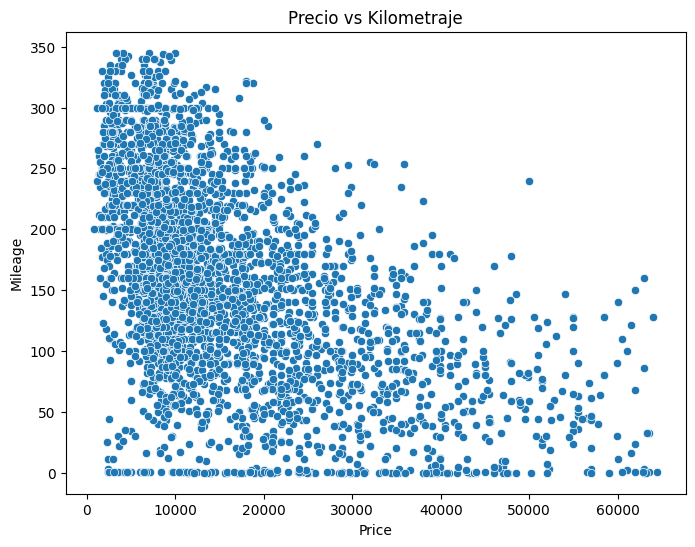

In [56]:
# Vemos la distribución del precio del coche en funcion de su kilometraje

plt.figure(figsize=[8,6])
plt.title("Precio vs Kilometraje")
sns.scatterplot(x='Price',y='Mileage',data=dataframe)

In [57]:
variables = dataframe[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.61,Mileage
1,4.81,Year
2,1.32,EngineV


In [58]:
dataframe_limpio = dataframe.drop('Year',axis=1)
dataframe_limpio.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration
0,Audi,23000.00,crossover,240,4.20,Petrol,yes
1,Toyota,18300.00,crossover,120,2.00,Petrol,yes
2,Audi,14200.00,vagon,200,2.70,Diesel,yes
3,Renault,10799.00,vagon,193,1.50,Diesel,yes
4,Volkswagen,1400.00,other,212,1.80,Gas,no


In [59]:
dataframe_limpio2=dataframe_limpio

In [60]:
dummies = pd.get_dummies(dataframe_limpio2,drop_first=True)

In [61]:
# Dividimos en x e y
X = dummies.drop('Price',axis=1)
y = dummies['Price']

In [62]:
# Dividimos en train y test

X_train, X_test, y_train, y_test = train_test_split(dummies,y,test_size=0.2, random_state=365)

In [63]:
scaler = StandardScaler()
scaler.fit(X[['Mileage','EngineV']])

StandardScaler()

In [64]:
# Estandarizamos SOLO LOS DATOS NUMERICOS
inputs_scaled = scaler.transform(X[['Mileage','EngineV']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['Mileage','EngineV'])
scaled_data.head()

,Mileage,EngineV
0,1.03,0.31
1,-0.43,-0.15
2,0.54,-0.00
3,0.46,-0.25
4,0.69,-0.19


In [65]:
# Añadimos los datos estandarizados a la x
X =scaled_data.join(X.drop(['Mileage','EngineV'],axis=1))
X.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,1.03,0.31,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,-0.43,-0.15,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
2,0.54,-0.00,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.46,-0.25,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,0.69,-0.19,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False


In [66]:
# Modelo 1
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


lr.fit(X_train,y_train)


y_pred_lr = lr.predict(X_test)

r = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R2 :",r)
print("RMSE :",rmse)

R2 : 1.0
RMSE : 2.1245721703584432e-11


In [67]:
# Modelo 2
rf = RandomForestRegressor()


rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)

r = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R2 :",r)
print("RMSE :",rmse)

R2 : 0.9999799672201028
RMSE : 54.19769826122193


In [68]:
# Modelo 3
gbt = GradientBoostingRegressor()


gbt.fit(X_train,y_train)


y_pred_gbt = gbt.predict(X_test)

r = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R2 :",r)
print("RMSE :",rmse)

R2 : 0.9999281228696221
RMSE : 102.66102546587818


In [69]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

C:\Users\34722\AppData\Local\Temp\ipykernel_4396\2638377707.py:3: RuntimeWarning: overflow encountered in exp
  df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])
c:\Users\34722\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Predicted Price,Actual Price,Residual,Difference%
682,inf,inf,NaN,NaN
683,inf,inf,NaN,NaN
684,inf,inf,NaN,NaN
685,inf,inf,NaN,NaN
686,inf,inf,NaN,NaN


In [70]:
df_ev.describe()

c:\Users\34722\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\34722\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Predicted Price,Actual Price,Residual,Difference%
count,687.00,687.00,0.00,0.00
mean,inf,inf,NaN,NaN
std,NaN,NaN,NaN,NaN
min,inf,inf,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,inf,inf,NaN,NaN


In [71]:
print('-'*50,'FORMA 2','-'*50)
print('-'*50,'FORMA 2','-'*50)
print('-'*50,'FORMA 2','-'*50)
print('-'*50,'FORMA 2','-'*50)
print('-'*50,'FORMA 2','-'*50)
print('-'*50,'FORMA 2','-'*50)

-------------------------------------------------- FORMA 2 --------------------------------------------------
-------------------------------------------------- FORMA 2 --------------------------------------------------
-------------------------------------------------- FORMA 2 --------------------------------------------------
-------------------------------------------------- FORMA 2 --------------------------------------------------
-------------------------------------------------- FORMA 2 --------------------------------------------------
-------------------------------------------------- FORMA 2 --------------------------------------------------


In [72]:
# Creamos el dataframe

url = r'C:\Users\34722\Documents\DataScience\EjerciciosResueltos\Entregas\src\data\car_price_data1_limpio.csv'
dataframe = pd.read_csv(url)

In [73]:
# Let's transform 'Price' with a log transformation
log_price = np.log(dataframe['Price'])

# Then we add it to our data frame
dataframe['log_price'] = log_price


dataframe.drop('Price',axis=1, inplace=True)
dataframe.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Audi,crossover,240,4.20,Petrol,yes,2007,10.04
1,Toyota,crossover,120,2.00,Petrol,yes,2011,9.81
2,Audi,vagon,200,2.70,Diesel,yes,2006,9.56
3,Renault,vagon,193,1.50,Diesel,yes,2012,9.29
4,Volkswagen,other,212,1.80,Gas,no,1999,7.24


<Axes: title={'center': 'Log precio vs Kilometraje'}, xlabel='Mileage', ylabel='log_price'>

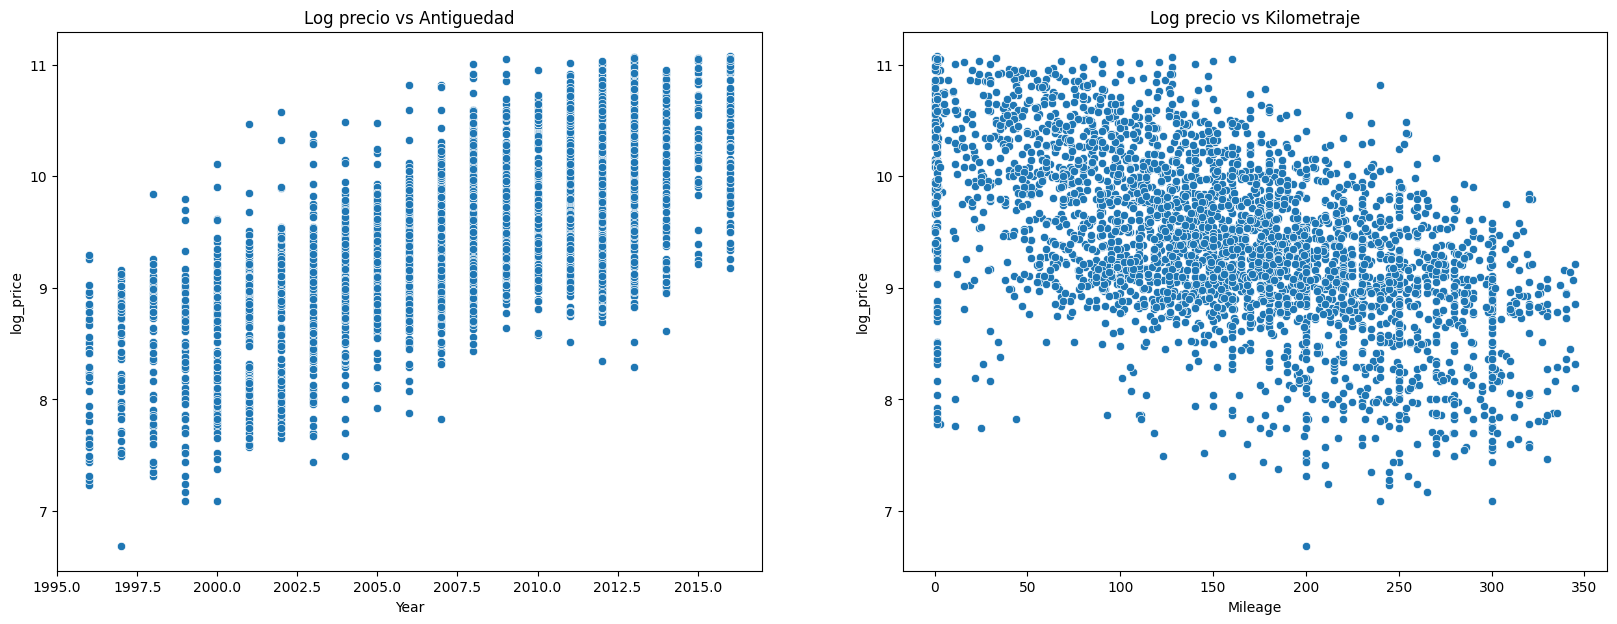

In [74]:
''' 
Vemos la distribución del precio de los coches 
en funcion de su antiguedad y kilometraje 
despues de hacer el logaritmo
'''
plt.figure(figsize=[20,7])
plt.subplot(1,2,1)
plt.title("Log precio vs Antiguedad")
sns.scatterplot(x='Year',y='log_price',data=dataframe)

plt.subplot(1,2,2)
plt.title("Log precio vs Kilometraje")
sns.scatterplot(y='log_price',x='Mileage',data=dataframe)

In [75]:
# Cojemos las variables numericas

variables = dataframe[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.61,Mileage
1,4.81,Year
2,1.32,EngineV


In [76]:
dataframe_limpio = dataframe.drop('Year',axis=1)


In [77]:
dataframe_limpio.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,Audi,crossover,240,4.20,Petrol,yes,10.04
1,Toyota,crossover,120,2.00,Petrol,yes,9.81
2,Audi,vagon,200,2.70,Diesel,yes,9.56
3,Renault,vagon,193,1.50,Diesel,yes,9.29
4,Volkswagen,other,212,1.80,Gas,no,7.24


In [78]:
dataframe_limpio2=dataframe_limpio

In [79]:
dataframe_limpio= dataframe_limpio.drop(['Brand','Body','Registration','Engine Type'],axis=1)

In [80]:
temp_data = dataframe_limpio.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

Mileage   0.55
EngineV   0.03
dtype: float64


<Axes: >

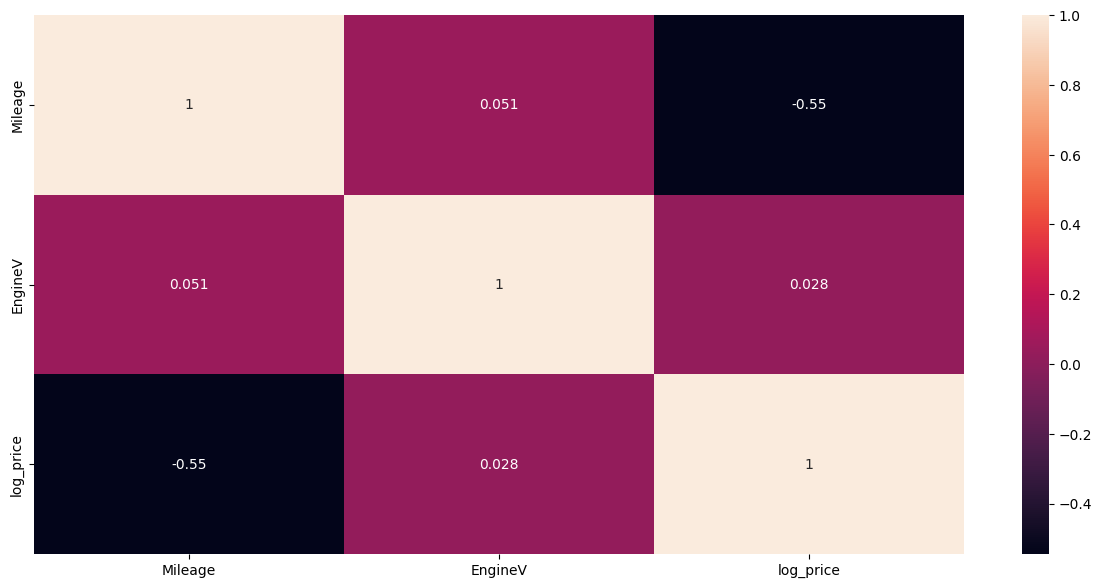

In [81]:
'''
VISUALIZAMOS LA CORRELACION SOLO CON LAS COLUMNAS NUMERICAS
PORQUE SOLO NOS PERMITE HACERLO CON COLUMNAS NUMERICAS
'''

plt.figure(figsize=[15,7])
sns.heatmap(dataframe_limpio.corr(), annot=True)

In [82]:
print('-'*25,'Miramos las columnas más importantes con RandomForestRegression','-'*25)
print('-'*25,'Miramos las columnas más importantes con RandomForestRegression','-'*25)
print('-'*25,'Miramos las columnas más importantes con RandomForestRegression','-'*25)
print('-'*25,'Miramos las columnas más importantes con RandomForestRegression','-'*25)
print('-'*25,'Miramos las columnas más importantes con RandomForestRegression','-'*25)
print('-'*25,'Miramos las columnas más importantes con RandomForestRegression','-'*25)

------------------------- Miramos las columnas más importantes con RandomForestRegression -------------------------
------------------------- Miramos las columnas más importantes con RandomForestRegression -------------------------
------------------------- Miramos las columnas más importantes con RandomForestRegression -------------------------
------------------------- Miramos las columnas más importantes con RandomForestRegression -------------------------
------------------------- Miramos las columnas más importantes con RandomForestRegression -------------------------
------------------------- Miramos las columnas más importantes con RandomForestRegression -------------------------


In [83]:
# Dividimos en X e y para ver la importancia de las columnas
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

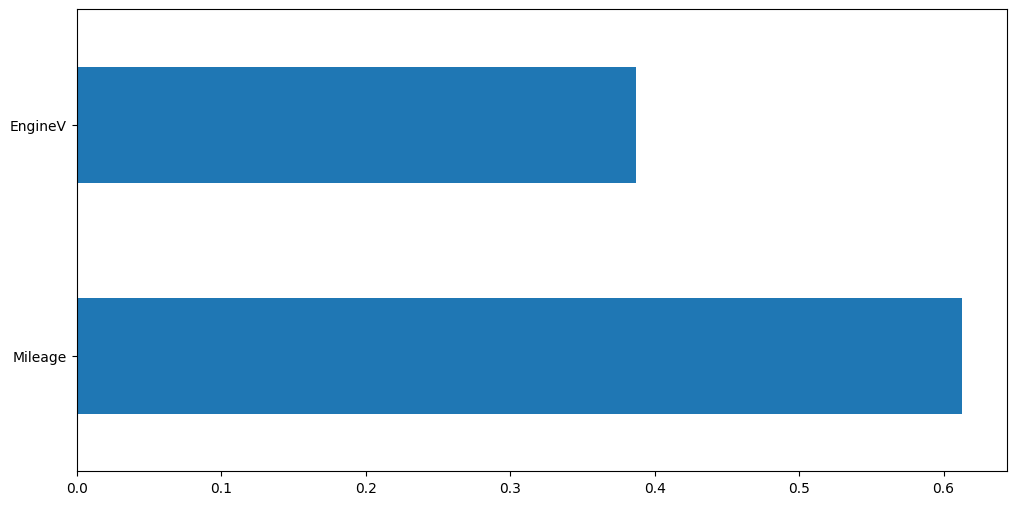

In [84]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [85]:
print(feat_importances.sort_values(ascending=False))

Mileage   0.61
EngineV   0.39
dtype: float64


In [86]:
print('-'*25,'Miramos las columnas más importantes con ExtraTreesRegressor','-'*25)
print('-'*25,'Miramos las columnas más importantes con ExtraTreesRegressor','-'*25)
print('-'*25,'Miramos las columnas más importantes con ExtraTreesRegressor','-'*25)
print('-'*25,'Miramos las columnas más importantes con ExtraTreesRegressor','-'*25)
print('-'*25,'Miramos las columnas más importantes con ExtraTreesRegressor','-'*25)
print('-'*25,'Miramos las columnas más importantes con ExtraTreesRegressor','-'*25)

------------------------- Miramos las columnas más importantes con ExtraTreesRegressor -------------------------
------------------------- Miramos las columnas más importantes con ExtraTreesRegressor -------------------------
------------------------- Miramos las columnas más importantes con ExtraTreesRegressor -------------------------
------------------------- Miramos las columnas más importantes con ExtraTreesRegressor -------------------------
------------------------- Miramos las columnas más importantes con ExtraTreesRegressor -------------------------
------------------------- Miramos las columnas más importantes con ExtraTreesRegressor -------------------------


In [87]:
# Dividimos en X e y para ver la importancia de las columnas

X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

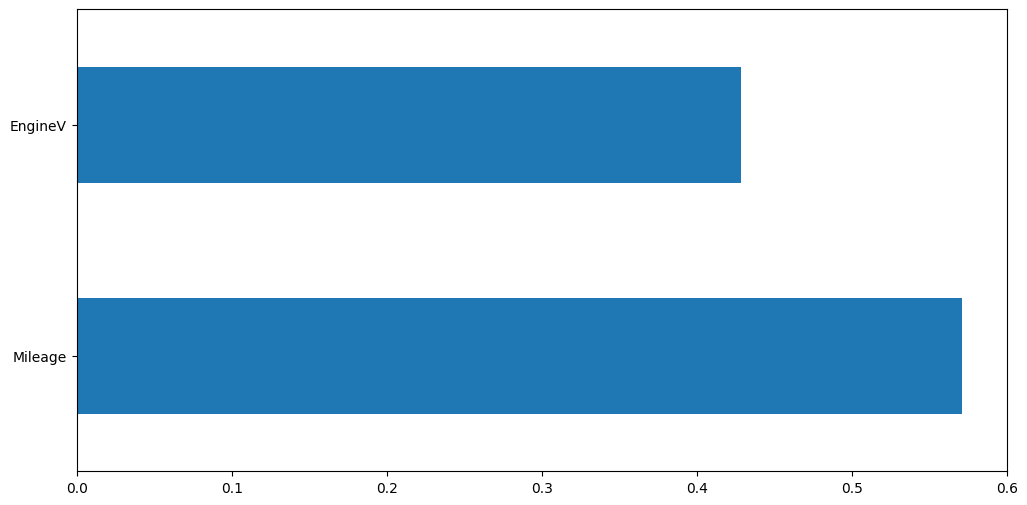

In [88]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [89]:
print(feat_importances.sort_values(ascending=False))

Mileage   0.57
EngineV   0.43
dtype: float64


In [90]:
# Hacemos un get dummies para categorizar las variables no numéricas (Marca...)

dummies = pd.get_dummies(dataframe_limpio2,drop_first=True)

In [91]:
dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,240,4.20,10.04,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,120,2.00,9.81,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
2,200,2.70,9.56,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,193,1.50,9.29,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,212,1.80,7.24,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False


<Axes: >

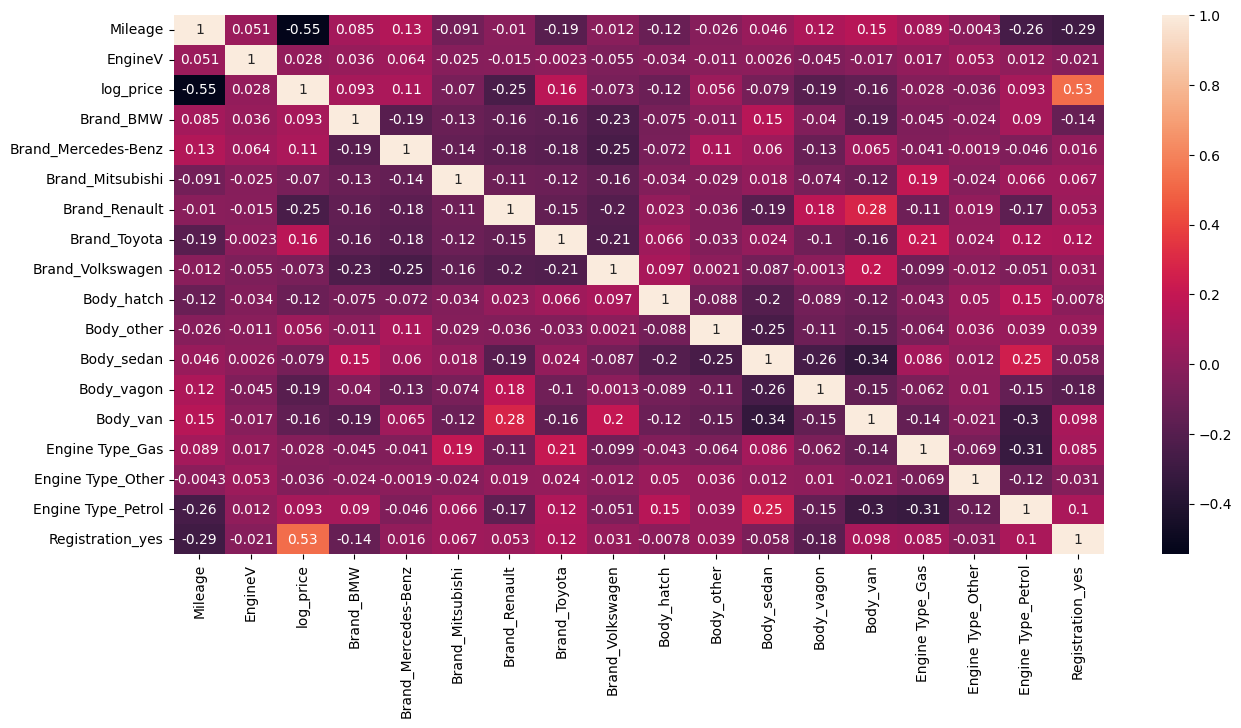

In [92]:
'''
VISUALIZAMOS LA CORRELACION SOLO CON LAS COLUMNAS NUMERICAS
PORQUE SOLO NOS PERMITE HACERLO CON COLUMNAS NUMERICAS
'''

plt.figure(figsize=[15,7])
sns.heatmap(dummies.corr(), annot=True)

In [93]:
# Dividimos en x e y
X = dummies.drop('log_price',axis=1)
y = dummies['log_price']

In [94]:
# Aprendemos a estandarizar SOLO LOS DATOS NUMERICOS
scaler = StandardScaler()
scaler.fit(X[['Mileage','EngineV']])

StandardScaler()

In [95]:
# Estandarizamos SOLO LOS DATOS NUMERICOS
inputs_scaled = scaler.transform(X[['Mileage','EngineV']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['Mileage','EngineV'])
scaled_data.head()

,Mileage,EngineV
0,1.03,0.31
1,-0.43,-0.15
2,0.54,-0.00
3,0.46,-0.25
4,0.69,-0.19


In [96]:
# Añadimos los datos estandarizados a la x
X =scaled_data.join(X.drop(['Mileage','EngineV'],axis=1))
X.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,1.03,0.31,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,-0.43,-0.15,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
2,0.54,-0.00,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.46,-0.25,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,0.69,-0.19,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False


In [97]:
# Dividimos en train y test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=365)

In [98]:
# Modelo 1
lr = LinearRegression()


lr.fit(X_train,y_train)


y_pred_lr = lr.predict(X_test)

r = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R2 :",r)
print("RMSE :",rmse)

R2 : 0.7056242754291364
RMSE : 0.4199020179247692


In [99]:
# Modelo 2
rf = RandomForestRegressor()


rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)

r = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R2 :",r)
print("RMSE :",rmse)

R2 : 0.7519972756723781
RMSE : 0.3854119630002141


In [100]:
# Modelo 3
gbt = GradientBoostingRegressor()


gbt.fit(X_train,y_train)


y_pred_gbt = gbt.predict(X_test)

r= r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R2 :",r)
print("RMSE :",rmse)

R2 : 0.7610440159862661
RMSE : 0.37831705510221886


In [101]:
# Modelo 4
xgbt = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgbt.fit(X_train,y_train)
y_pred_xgbt = xgbt.predict(X_test)

r= r2_score(y_test,y_pred_xgbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_xgbt))
print("R2 :",r)
print("RMSE :",rmse)

R2 : 0.7703695537226066
RMSE : 0.37086145678724014


In [102]:
lr = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("reglog", LinearRegression())])

gbt = Pipeline([
    ("scaler", StandardScaler()),
    ("gradientboosting", GradientBoostingRegressor())])

xgbt = Pipeline([
    ("scaler", StandardScaler()),
    ("gradientboosting", xgb.XGBRegressor())])


rf = RandomForestRegressor()

lr_param = {

}

gbt_param = {

}

xgbt_param = {
    # "xgbt__objective": ["reg:squarederror", "reg:squaredlogerror", "reg:logistic", "reg:absoluteerror"]
}

rf_param = {
    'n_estimators': [10,100,500],
    'max_features': [1,2,3]
}

gs_lr = GridSearchCV(lr,
lr_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

gs_gbt = GridSearchCV(gbt,
gbt_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

gs_rf = GridSearchCV(rf,
rf_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

gs_xgbt = GridSearchCV(xgbt,
xgbt_param,
cv=10,
scoring = 'r2',
n_jobs = -1,
verbose = 1)

grids = {
    "gs_lr": gs_lr,
    "gs_gbt": gs_gbt,
    "gs_xgbt": gs_xgbt,
    "gs_rg": gs_rf

}

In [103]:
%%time 
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
CPU times: total: 5.12 s
Wall time: 11.8 s


In [104]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids.sort_values(by = "Best score", ascending = False)

,Grid,Best score
3,gs_rg,0.77
2,gs_xgbt,0.77
1,gs_gbt,0.77
0,gs_lr,0.70
